In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('datasets/cluster_data_prepared.csv')

In [4]:
data.head()

,Unnamed: 0,HOUSEID,CENSUS_D,HHFAMINC,URBRUR,STRTTIME,ENDTIME,TRVLCMIN,WHYFROM_GENERAL,WHYTRP1S_GENERAL,dwell_home,dwell_work,dwell_public,VMT_Hr1,VMT_Hr2,VMT_Hr3,VMT_Hr4,VMT_Hr5,VMT_Hr6,VMT_Hr7,VMT_Hr8,VMT_Hr9,VMT_Hr10,VMT_Hr11,VMT_Hr12,VMT_Hr13,VMT_Hr14,VMT_Hr15,VMT_Hr16,VMT_Hr17,VMT_Hr18,VMT_Hr19,VMT_Hr20,VMT_Hr21,VMT_Hr22,VMT_Hr23,VMT_Hr24,location_hr_1,location_hr_2,location_hr_3,location_hr_4,location_hr_5,location_hr_6,location_hr_7,location_hr_8,location_hr_9,location_hr_10,location_hr_11,location_hr_12,location_hr_13,location_hr_14,location_hr_15,location_hr_16,location_hr_17,location_hr_18,location_hr_19,location_hr_20,location_hr_21,location_hr_22,location_hr_23,location_hr_24
0,0,30000094,9,30000.0,1,"[740, 1340, 1420, 1705]","[755, 1405, 1438, 1715]",68,"['Home', 'Work', 'Work', 'Work']","['Work', 'Work', 'Work', 'Home']",855.0,690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.05,0.000,0.000,0.000,0.000,0.000,5.883,5.898,0.0,0.000,4.864,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,1,1,1,0,0,0,0,0,0
1,1,30000095,3,62500.0,1,"[1000, 1140, 1230, 1415, 1600, 1700, 2000, 2330]","[1015, 1155, 1250, 1430, 1610, 1715, 2015, 2345]",120,"['Home', 'Public', 'Public', 'Public', 'Public...","['Public', 'Public', 'Public', 'Public', 'Publ...",633.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,1.926,3.247,3.896,0.000,6.340,0.0,1.226,3.618,0.0,0.0,3.641,0.0,0.0,2.907,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,3,2,2,3,2,2,2
2,2,30000194,9,5000.0,1,"[930, 1230]","[1015, 1430]",165,"['Home', 'Public']","['Public', 'Home']",1140.0,0.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,8.312,0.000,0.000,8.202,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,3,2,2,3,3,0,0,0,0,0,0,0,0,0
3,3,30000227,9,62500.0,1,"[845, 1045]","[910, 1110]",50,"['Home', 'Public']","['Public', 'Home']",1281.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.105,0.000,9.054,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,3,2,3,0,0,0,0,0,0,0,0,0,0,0,0
4,4,30000309,7,87500.0,1,"[1400, 1445]","[1405, 1450]",10,"['Home', 'Public']","['Public', 'Home']",1410.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,3.386,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Hierarchical Clustering
Hierarchical agglomerative cluster (HAC)

In [83]:
data = data.drop(columns=['Unnamed: 0', 'HOUSEID','WHYFROM_GENERAL','WHYTRP1S_GENERAL'])

In [84]:
data = data.drop(columns=['STRTTIME','ENDTIME'])

In [88]:
data.head()

,CENSUS_D,HHFAMINC,URBRUR,TRVLCMIN,dwell_home,dwell_work,dwell_public,VMT_Hr1,VMT_Hr2,VMT_Hr3,VMT_Hr4,VMT_Hr5,VMT_Hr6,VMT_Hr7,VMT_Hr8,VMT_Hr9,VMT_Hr10,VMT_Hr11,VMT_Hr12,VMT_Hr13,VMT_Hr14,VMT_Hr15,VMT_Hr16,VMT_Hr17,VMT_Hr18,VMT_Hr19,VMT_Hr20,VMT_Hr21,VMT_Hr22,VMT_Hr23,VMT_Hr24,location_hr_1,location_hr_2,location_hr_3,location_hr_4,location_hr_5,location_hr_6,location_hr_7,location_hr_8,location_hr_9,location_hr_10,location_hr_11,location_hr_12,location_hr_13,location_hr_14,location_hr_15,location_hr_16,location_hr_17,location_hr_18,location_hr_19,location_hr_20,location_hr_21,location_hr_22,location_hr_23,location_hr_24
0,9,30000.0,1,68,855.0,690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.05,0.000,0.000,0.000,0.000,0.000,5.883,5.898,0.0,0.000,4.864,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,1,1,1,0,0,0,0,0,0
1,3,62500.0,1,120,633.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,1.926,3.247,3.896,0.000,6.340,0.0,1.226,3.618,0.0,0.0,3.641,0.0,0.0,2.907,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,3,2,2,3,2,2,2
2,9,5000.0,1,165,1140.0,0.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,8.312,0.000,0.000,8.202,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,3,2,2,3,3,0,0,0,0,0,0,0,0,0
3,9,62500.0,1,50,1281.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.105,0.000,9.054,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,3,2,3,0,0,0,0,0,0,0,0,0,0,0,0
4,7,87500.0,1,10,1410.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,3.386,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


normalize the data and bring all the variables to the same scale

In [89]:
from sklearn.preprocessing import normalize
# Standardize data
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data) 
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,CENSUS_D,HHFAMINC,URBRUR,TRVLCMIN,dwell_home,dwell_work,dwell_public,VMT_Hr1,VMT_Hr2,VMT_Hr3,VMT_Hr4,VMT_Hr5,VMT_Hr6,VMT_Hr7,VMT_Hr8,VMT_Hr9,VMT_Hr10,VMT_Hr11,VMT_Hr12,VMT_Hr13,VMT_Hr14,VMT_Hr15,VMT_Hr16,VMT_Hr17,VMT_Hr18,VMT_Hr19,VMT_Hr20,VMT_Hr21,VMT_Hr22,VMT_Hr23,VMT_Hr24,location_hr_1,location_hr_2,location_hr_3,location_hr_4,location_hr_5,location_hr_6,location_hr_7,location_hr_8,location_hr_9,location_hr_10,location_hr_11,location_hr_12,location_hr_13,location_hr_14,location_hr_15,location_hr_16,location_hr_17,location_hr_18,location_hr_19,location_hr_20,location_hr_21,location_hr_22,location_hr_23,location_hr_24
0,0.000300,0.999327,0.000033,0.002265,0.028481,0.022985,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000196,0.000196,0.0,0.00000,0.000162,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000033,0.000033,0.000033,0.000033,0.000033,0.000033,0.000100,0.000033,0.000033,0.000033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000048,0.999921,0.000016,0.001920,0.010127,0.000000,0.007199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000031,0.000052,0.000062,0.000000,0.000101,0.0,0.00002,0.000058,0.0,0.0,0.000058,0.0,0.0,0.000047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000032,0.000032,0.000032,0.000032,0.000032,0.000048,0.000048,0.000032,0.000032,0.000048,0.000032,0.000032,0.000032
2,0.001753,0.974133,0.000195,0.032146,0.222102,0.000000,0.026302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.001619,0.000000,0.000000,0.001598,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000584,0.000390,0.000390,0.000584,0.000584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000144,0.999789,0.000016,0.000800,0.020492,0.000000,0.001520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000146,0.000000,0.000145,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000048,0.000032,0.000048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000080,0.999870,0.000011,0.000114,0.016112,0.000000,0.000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000039,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


draw the dendrogram to help us decide the number of clusters

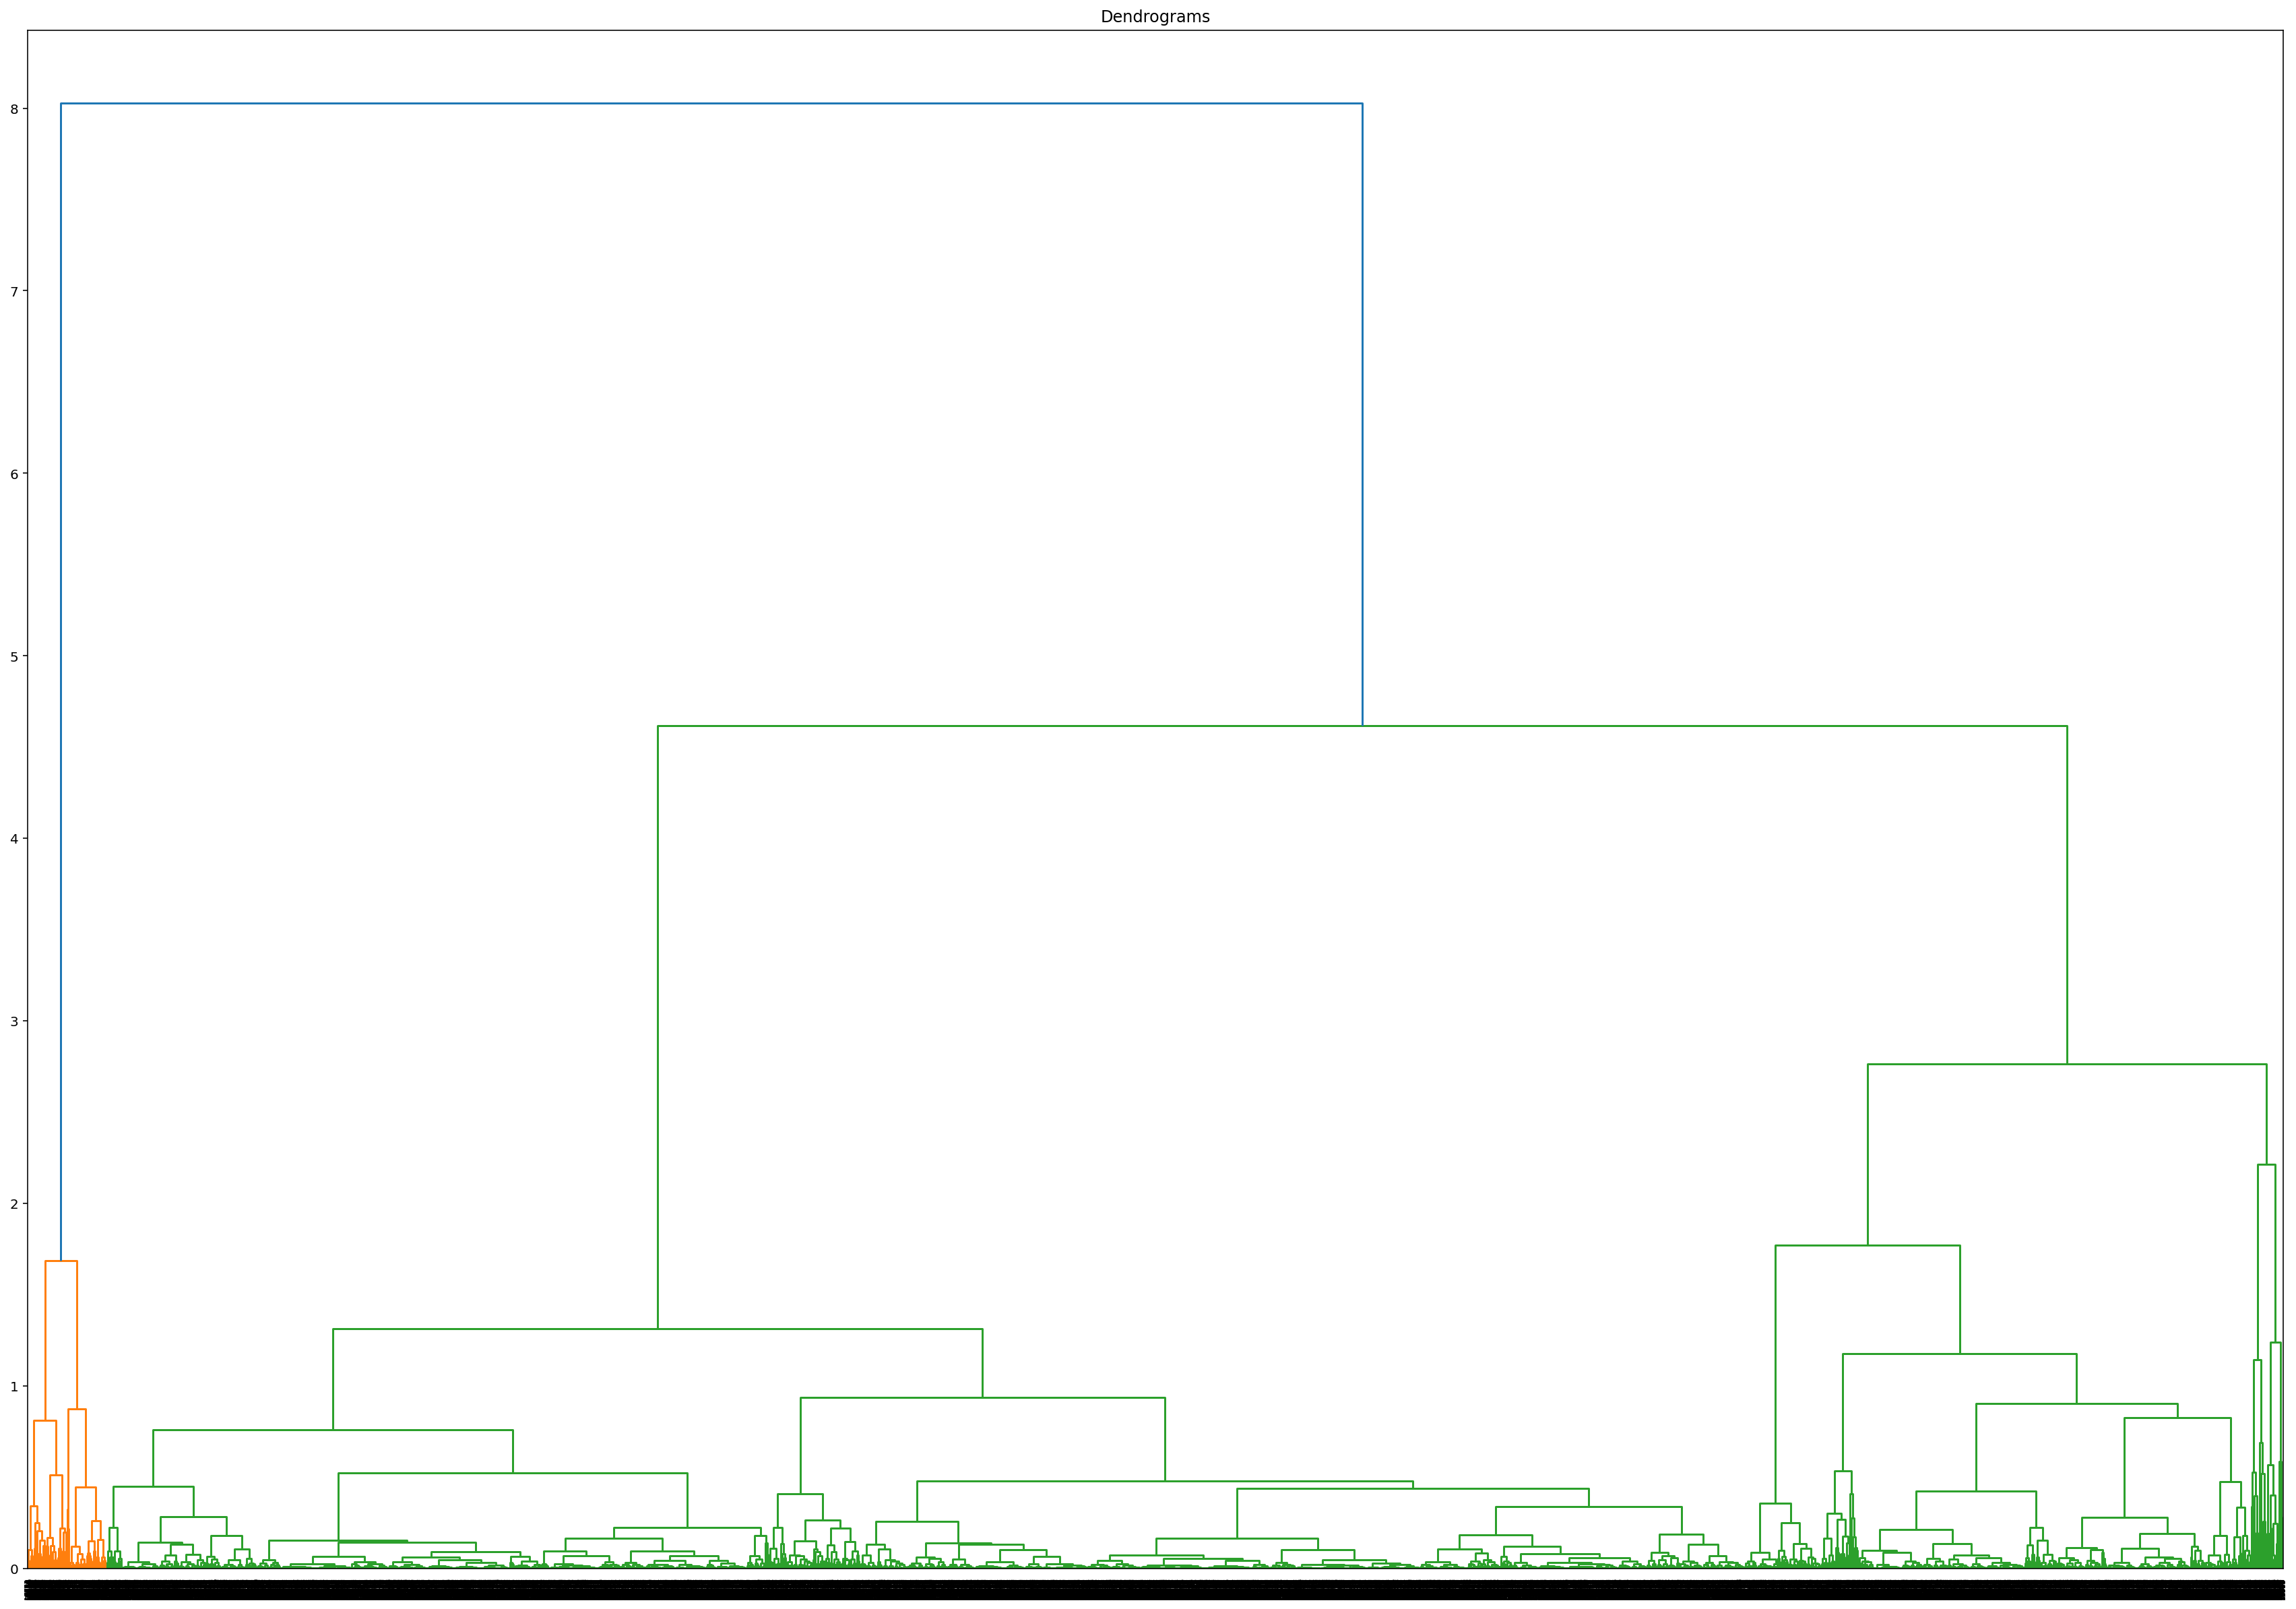

In [90]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 21))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

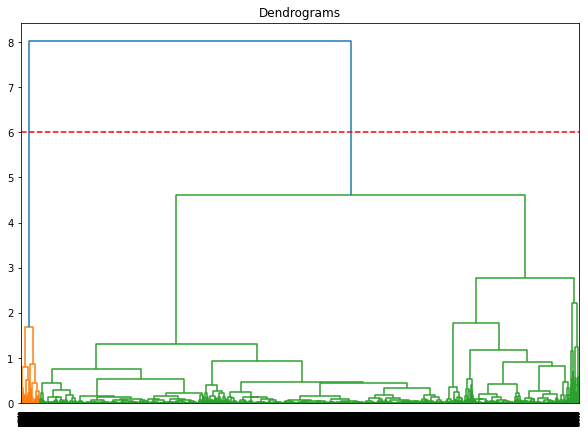

In [16]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

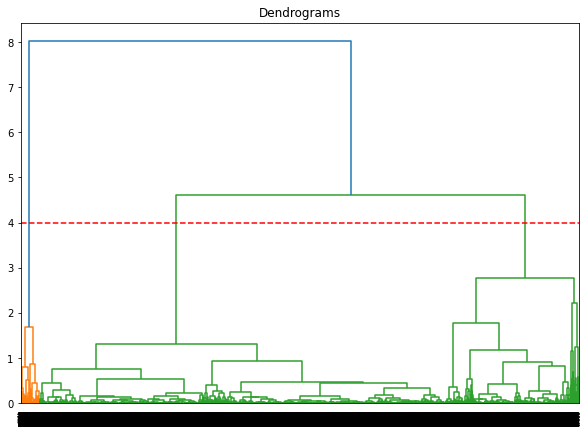

In [17]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_2.fit_predict(data_scaled)

array([0, 0, 1, ..., 0, 0, 0])

In [20]:
data_scaled['cluster_2'] = cluster_2.fit_predict(data_scaled)

In [21]:
from sklearn.cluster import AgglomerativeClustering
cluster_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_3.fit_predict(data_scaled)

array([2, 2, 1, ..., 2, 2, 2])

In [22]:
data_scaled['cluster_3'] = cluster_3.fit_predict(data_scaled)

In [23]:
data_scaled.head()

,CENSUS_D,HHFAMINC,URBRUR,TRVLCMIN,dwell_home,dwell_work,dwell_public,VMT_Hr1,VMT_Hr2,VMT_Hr3,VMT_Hr4,VMT_Hr5,VMT_Hr6,VMT_Hr7,VMT_Hr8,VMT_Hr9,VMT_Hr10,VMT_Hr11,VMT_Hr12,VMT_Hr13,VMT_Hr14,VMT_Hr15,VMT_Hr16,VMT_Hr17,VMT_Hr18,VMT_Hr19,VMT_Hr20,VMT_Hr21,VMT_Hr22,VMT_Hr23,VMT_Hr24,location_hr_1,location_hr_2,location_hr_3,location_hr_4,location_hr_5,location_hr_6,location_hr_7,location_hr_8,location_hr_9,location_hr_10,location_hr_11,location_hr_12,location_hr_13,location_hr_14,location_hr_15,location_hr_16,location_hr_17,location_hr_18,location_hr_19,location_hr_20,location_hr_21,location_hr_22,location_hr_23,location_hr_24,cluster_2,cluster_3
0,0.000300,0.999327,0.000033,0.002265,0.028481,0.022985,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000196,0.000196,0.0,0.00000,0.000162,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000033,0.000033,0.000033,0.000033,0.000033,0.000033,0.000100,0.000033,0.000033,0.000033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2
1,0.000048,0.999921,0.000016,0.001920,0.010127,0.000000,0.007199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000031,0.000052,0.000062,0.000000,0.000101,0.0,0.00002,0.000058,0.0,0.0,0.000058,0.0,0.0,0.000047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000032,0.000032,0.000032,0.000032,0.000032,0.000048,0.000048,0.000032,0.000032,0.000048,0.000032,0.000032,0.000032,0,2
2,0.001753,0.974133,0.000195,0.032146,0.222102,0.000000,0.026302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.001619,0.000000,0.000000,0.001598,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000584,0.000390,0.000390,0.000584,0.000584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
3,0.000144,0.999789,0.000016,0.000800,0.020492,0.000000,0.001520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000146,0.000000,0.000145,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000048,0.000032,0.000048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2
4,0.000080,0.999870,0.000011,0.000114,0.016112,0.000000,0.000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000039,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2


In [30]:
data['cluster_2'] = data_scaled['cluster_2']
data['cluster_3'] = data_scaled['cluster_3']

In [31]:
data.head()

,CENSUS_D,HHFAMINC,URBRUR,TRVLCMIN,dwell_home,dwell_work,dwell_public,VMT_Hr1,VMT_Hr2,VMT_Hr3,VMT_Hr4,VMT_Hr5,VMT_Hr6,VMT_Hr7,VMT_Hr8,VMT_Hr9,VMT_Hr10,VMT_Hr11,VMT_Hr12,VMT_Hr13,VMT_Hr14,VMT_Hr15,VMT_Hr16,VMT_Hr17,VMT_Hr18,VMT_Hr19,VMT_Hr20,VMT_Hr21,VMT_Hr22,VMT_Hr23,VMT_Hr24,location_hr_1,location_hr_2,location_hr_3,location_hr_4,location_hr_5,location_hr_6,location_hr_7,location_hr_8,location_hr_9,location_hr_10,location_hr_11,location_hr_12,location_hr_13,location_hr_14,location_hr_15,location_hr_16,location_hr_17,location_hr_18,location_hr_19,location_hr_20,location_hr_21,location_hr_22,location_hr_23,location_hr_24,cluster_2,cluster_3
0,9,30000.0,1,68,855.0,690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.05,0.000,0.000,0.000,0.000,0.000,5.883,5.898,0.0,0.000,4.864,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,1,1,1,0,0,0,0,0,0,0,2
1,3,62500.0,1,120,633.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,1.926,3.247,3.896,0.000,6.340,0.0,1.226,3.618,0.0,0.0,3.641,0.0,0.0,2.907,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,3,2,2,3,2,2,2,0,2
2,9,5000.0,1,165,1140.0,0.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,8.312,0.000,0.000,8.202,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,3,2,2,3,3,0,0,0,0,0,0,0,0,0,1,1
3,9,62500.0,1,50,1281.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.105,0.000,9.054,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,3,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,7,87500.0,1,10,1410.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,3.386,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


PCA to distinguish the factor weights of the features

In [35]:
data = cluster_data.copy()

In [43]:
data.head()

,CENSUS_D,HHFAMINC,URBRUR,TRVLCMIN,dwell_home,dwell_work,dwell_public,VMT_Hr1,VMT_Hr2,VMT_Hr3,VMT_Hr4,VMT_Hr5,VMT_Hr6,VMT_Hr7,VMT_Hr8,VMT_Hr9,VMT_Hr10,VMT_Hr11,VMT_Hr12,VMT_Hr13,VMT_Hr14,VMT_Hr15,VMT_Hr16,VMT_Hr17,VMT_Hr18,VMT_Hr19,VMT_Hr20,VMT_Hr21,VMT_Hr22,VMT_Hr23,VMT_Hr24,location_hr_1,location_hr_2,location_hr_3,location_hr_4,location_hr_5,location_hr_6,location_hr_7,location_hr_8,location_hr_9,location_hr_10,location_hr_11,location_hr_12,location_hr_13,location_hr_14,location_hr_15,location_hr_16,location_hr_17,location_hr_18,location_hr_19,location_hr_20,location_hr_21,location_hr_22,location_hr_23,location_hr_24,cluster_2,cluster_3
0,9,30000.0,1,68,855.0,690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.05,0.000,0.000,0.000,0.000,0.000,5.883,5.898,0.0,0.000,4.864,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,1,1,1,0,0,0,0,0,0,0,2
1,3,62500.0,1,120,633.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,1.926,3.247,3.896,0.000,6.340,0.0,1.226,3.618,0.0,0.0,3.641,0.0,0.0,2.907,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,3,2,2,3,2,2,2,0,2
2,9,5000.0,1,165,1140.0,0.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,8.312,0.000,0.000,8.202,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,3,2,2,3,3,0,0,0,0,0,0,0,0,0,1,1
3,9,62500.0,1,50,1281.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.105,0.000,9.054,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,3,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,7,87500.0,1,10,1410.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,3.386,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [42]:
data = data.drop(columns=['Unnamed: 0'])

In [44]:
X = data.drop(columns=['cluster_2','cluster_3'])
X.head()

,CENSUS_D,HHFAMINC,URBRUR,TRVLCMIN,dwell_home,dwell_work,dwell_public,VMT_Hr1,VMT_Hr2,VMT_Hr3,VMT_Hr4,VMT_Hr5,VMT_Hr6,VMT_Hr7,VMT_Hr8,VMT_Hr9,VMT_Hr10,VMT_Hr11,VMT_Hr12,VMT_Hr13,VMT_Hr14,VMT_Hr15,VMT_Hr16,VMT_Hr17,VMT_Hr18,VMT_Hr19,VMT_Hr20,VMT_Hr21,VMT_Hr22,VMT_Hr23,VMT_Hr24,location_hr_1,location_hr_2,location_hr_3,location_hr_4,location_hr_5,location_hr_6,location_hr_7,location_hr_8,location_hr_9,location_hr_10,location_hr_11,location_hr_12,location_hr_13,location_hr_14,location_hr_15,location_hr_16,location_hr_17,location_hr_18,location_hr_19,location_hr_20,location_hr_21,location_hr_22,location_hr_23,location_hr_24
0,9,30000.0,1,68,855.0,690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.05,0.000,0.000,0.000,0.000,0.000,5.883,5.898,0.0,0.000,4.864,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,1,1,1,0,0,0,0,0,0
1,3,62500.0,1,120,633.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,1.926,3.247,3.896,0.000,6.340,0.0,1.226,3.618,0.0,0.0,3.641,0.0,0.0,2.907,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,3,2,2,3,2,2,2
2,9,5000.0,1,165,1140.0,0.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,8.312,0.000,0.000,8.202,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,3,2,2,3,3,0,0,0,0,0,0,0,0,0
3,9,62500.0,1,50,1281.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.105,0.000,9.054,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,3,2,3,0,0,0,0,0,0,0,0,0,0,0,0
4,7,87500.0,1,10,1410.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,3.386,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
X = data.drop(columns=['cluster_2','cluster_3'])
y_1 = data['cluster_2']
y_2 = data['cluster_3']

In [46]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y_1, test_size=0.2, random_state=0)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y_2, test_size=0.2, random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_1 = sc.fit_transform(X_train_1)
X_test_1 = sc.transform(X_test_1)


In [54]:
# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(X),columns = X.columns) 


In [70]:
# PCA
pca = PCA()
pca.fit_transform(data_scaled)


array([[-7.20759931e-01,  4.12880596e-01,  1.17867345e-01, ...,
        -2.90748486e-03,  1.82167134e-04,  8.52918751e-04],
       [ 9.51574374e-01, -1.37609489e+00, -5.99259541e+00, ...,
         5.15317536e-04, -1.98037714e-03,  1.25988017e-03],
       [-7.30994628e-01,  5.12101428e-01,  2.67213727e-01, ...,
        -5.56221877e-03, -2.92589389e-03, -3.79051701e-03],
       ...,
       [-1.01612873e-01,  1.69506362e-03, -5.17015298e-01, ...,
        -4.85355502e-03, -1.11545965e-03, -1.51870707e-03],
       [-8.58789061e-01,  1.14475651e+00, -5.56832021e-01, ...,
         1.46433990e-03, -6.74744946e-04, -1.52758620e-03],
       [-6.38991186e-01,  5.53598971e-01,  3.04668614e-02, ...,
        -9.25555860e-04, -8.94601947e-04, -5.43639639e-04]])

In [71]:
pca.explained_variance_ratio_

array([1.87282075e-01, 1.54568162e-01, 7.36285999e-02, 5.08841909e-02,
       3.21128118e-02, 3.11107206e-02, 2.91263352e-02, 2.47087756e-02,
       2.15043401e-02, 2.07995595e-02, 1.81544418e-02, 1.70392912e-02,
       1.64436788e-02, 1.56336947e-02, 1.48612812e-02, 1.45845192e-02,
       1.44320203e-02, 1.36583366e-02, 1.32537085e-02, 1.26046797e-02,
       1.25807203e-02, 1.22448731e-02, 1.19796850e-02, 1.16166293e-02,
       1.14791603e-02, 1.10044908e-02, 1.06324207e-02, 1.00532477e-02,
       9.78718792e-03, 9.08163213e-03, 8.32165763e-03, 8.19827273e-03,
       7.87224718e-03, 7.73373489e-03, 7.59987064e-03, 7.37098034e-03,
       7.16634540e-03, 6.95811774e-03, 6.60635809e-03, 6.27627026e-03,
       5.93757754e-03, 5.50870820e-03, 5.05611084e-03, 4.64509057e-03,
       4.23520809e-03, 3.69655677e-03, 3.15042238e-03, 2.58270211e-03,
       1.63129231e-03, 1.58794411e-03, 6.13059172e-04, 2.58033781e-04,
       6.54828442e-05, 5.37664100e-05, 2.29202163e-05])

In [58]:
pca = PCA(n_components=2)
pca.fit_transform(data_scaled)

array([[-0.72075993,  0.41288076],
       [ 0.95157437, -1.37609481],
       [-0.73099463,  0.51210142],
       ...,
       [-0.10161288,  0.00169484],
       [-0.85878907,  1.14475658],
       [-0.63899115,  0.55359861]])

In [48]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_1 = pca.fit_transform(X_train_1)
X_test_1 = pca.transform(X_test_1)


In [74]:
explained_variance = pca.explained_variance_ratio_

In [60]:
# Dump components relations with features:
pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2'])


,CENSUS_D,HHFAMINC,URBRUR,TRVLCMIN,dwell_home,dwell_work,dwell_public,VMT_Hr1,VMT_Hr2,VMT_Hr3,VMT_Hr4,VMT_Hr5,VMT_Hr6,VMT_Hr7,VMT_Hr8,VMT_Hr9,VMT_Hr10,VMT_Hr11,VMT_Hr12,VMT_Hr13,VMT_Hr14,VMT_Hr15,VMT_Hr16,VMT_Hr17,VMT_Hr18,VMT_Hr19,VMT_Hr20,VMT_Hr21,VMT_Hr22,VMT_Hr23,VMT_Hr24,location_hr_1,location_hr_2,location_hr_3,location_hr_4,location_hr_5,location_hr_6,location_hr_7,location_hr_8,location_hr_9,location_hr_10,location_hr_11,location_hr_12,location_hr_13,location_hr_14,location_hr_15,location_hr_16,location_hr_17,location_hr_18,location_hr_19,location_hr_20,location_hr_21,location_hr_22,location_hr_23,location_hr_24
PC-1,0.003157,0.022660,0.004989,0.154503,-0.115423,0.017261,0.085251,0.156263,0.198220,0.236794,0.250251,0.215378,0.225734,0.195516,0.181223,0.194294,0.166404,0.185342,0.190226,0.184919,0.167032,0.165733,0.170231,0.163682,0.170724,0.161532,0.133633,0.108792,0.097075,0.088570,0.056158,0.138996,0.136976,0.134531,0.136210,0.137447,0.133413,0.123517,0.108038,0.092022,0.083495,0.071083,0.061009,0.058224,0.061741,0.062429,0.063298,0.060776,0.062411,0.066445,0.068843,0.070388,0.073688,0.078305,0.079224
PC-2,-0.006840,-0.012568,0.005769,-0.021407,0.231857,-0.035945,-0.110044,0.122708,0.145751,0.164590,0.169028,0.127231,0.134353,0.105790,0.090043,0.103697,0.083837,0.097398,0.104435,0.099798,0.080878,0.077159,0.085021,0.070092,0.085520,0.080765,0.063788,0.056418,0.049404,0.059529,0.046189,-0.264088,-0.266704,-0.269571,-0.269126,-0.268700,-0.254587,-0.228453,-0.195014,-0.164908,-0.147293,-0.123832,-0.102624,-0.091050,-0.089884,-0.087469,-0.085392,-0.078833,-0.078837,-0.082282,-0.084272,-0.088835,-0.092780,-0.103025,-0.109448


In [75]:
explained_variance

array([1.87282075e-01, 1.54568162e-01, 7.36285999e-02, 5.08841909e-02,
       3.21128118e-02, 3.11107206e-02, 2.91263352e-02, 2.47087756e-02,
       2.15043401e-02, 2.07995595e-02, 1.81544418e-02, 1.70392912e-02,
       1.64436788e-02, 1.56336947e-02, 1.48612812e-02, 1.45845192e-02,
       1.44320203e-02, 1.36583366e-02, 1.32537085e-02, 1.26046797e-02,
       1.25807203e-02, 1.22448731e-02, 1.19796850e-02, 1.16166293e-02,
       1.14791603e-02, 1.10044908e-02, 1.06324207e-02, 1.00532477e-02,
       9.78718792e-03, 9.08163213e-03, 8.32165763e-03, 8.19827273e-03,
       7.87224718e-03, 7.73373489e-03, 7.59987064e-03, 7.37098034e-03,
       7.16634540e-03, 6.95811774e-03, 6.60635809e-03, 6.27627026e-03,
       5.93757754e-03, 5.50870820e-03, 5.05611084e-03, 4.64509057e-03,
       4.23520809e-03, 3.69655677e-03, 3.15042238e-03, 2.58270211e-03,
       1.63129231e-03, 1.58794411e-03, 6.13059172e-04, 2.58033781e-04,
       6.54828442e-05, 5.37664100e-05, 2.29202163e-05])

In [79]:
(explained_variance[0] + explained_variance[1] + explained_variance[2] + explained_variance[3]
+explained_variance[4] + explained_variance[5] + explained_variance[6] + explained_variance[7]
+explained_variance[8] + explained_variance[9] + explained_variance[10] + explained_variance[11]
+explained_variance[12] + explained_variance[13] + explained_variance[14] + explained_variance[15]
+explained_variance[16] + explained_variance[17] + explained_variance[18] + explained_variance[19])/explained_variance.sum()

0.7763912225097448

In [47]:
# data.to_csv('cluster_hac.csv')

Analysis of clustering results

In [5]:
cluster_data = pd.read_csv('datasets/cluster_hac.csv')

In [6]:
cluster_data.head()

,Unnamed: 0,CENSUS_D,HHFAMINC,URBRUR,TRVLCMIN,dwell_home,dwell_work,dwell_public,VMT_Hr1,VMT_Hr2,VMT_Hr3,VMT_Hr4,VMT_Hr5,VMT_Hr6,VMT_Hr7,VMT_Hr8,VMT_Hr9,VMT_Hr10,VMT_Hr11,VMT_Hr12,VMT_Hr13,VMT_Hr14,VMT_Hr15,VMT_Hr16,VMT_Hr17,VMT_Hr18,VMT_Hr19,VMT_Hr20,VMT_Hr21,VMT_Hr22,VMT_Hr23,VMT_Hr24,location_hr_1,location_hr_2,location_hr_3,location_hr_4,location_hr_5,location_hr_6,location_hr_7,location_hr_8,location_hr_9,location_hr_10,location_hr_11,location_hr_12,location_hr_13,location_hr_14,location_hr_15,location_hr_16,location_hr_17,location_hr_18,location_hr_19,location_hr_20,location_hr_21,location_hr_22,location_hr_23,location_hr_24,cluster_2,cluster_3
0,0,9,30000.0,1,68,855.0,690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.05,0.000,0.000,0.000,0.000,0.000,5.883,5.898,0.0,0.000,4.864,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,1,1,1,0,0,0,0,0,0,0,2
1,1,3,62500.0,1,120,633.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,1.926,3.247,3.896,0.000,6.340,0.0,1.226,3.618,0.0,0.0,3.641,0.0,0.0,2.907,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,3,2,2,3,2,2,2,0,2
2,2,9,5000.0,1,165,1140.0,0.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,8.312,0.000,0.000,8.202,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,3,2,2,3,3,0,0,0,0,0,0,0,0,0,1,1
3,3,9,62500.0,1,50,1281.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.105,0.000,9.054,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,3,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,4,7,87500.0,1,10,1410.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,3.386,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [7]:
cluster_data[cluster_data['cluster_3'] == 2]['dwell_home'].mean()

898.4101986461012

In [8]:
print('mean of dwell time cluster 1:')
print('at home',cluster_data[cluster_data['cluster_3'] == 0]['dwell_home'].mean())
print('at home',cluster_data[cluster_data['cluster_3'] == 0]['dwell_home'].std())
print('at workplace',cluster_data[cluster_data['cluster_3'] == 0]['dwell_work'].mean())
print('at workplace',cluster_data[cluster_data['cluster_3'] == 0]['dwell_work'].std())
print('at publice',cluster_data[cluster_data['cluster_3'] == 0]['dwell_public'].mean())
print('at publice',cluster_data[cluster_data['cluster_3'] == 0]['dwell_public'].std())
print('mean of dwell time cluster 2:')
print('at home',cluster_data[cluster_data['cluster_3'] == 1]['dwell_home'].mean())
print('at home',cluster_data[cluster_data['cluster_3'] == 1]['dwell_home'].std())
print('at workplace',cluster_data[cluster_data['cluster_3'] == 1]['dwell_work'].mean())
print('at workplace',cluster_data[cluster_data['cluster_3'] == 1]['dwell_work'].std())
print('at publice',cluster_data[cluster_data['cluster_3'] == 1]['dwell_public'].mean())
print('at publice',cluster_data[cluster_data['cluster_3'] == 1]['dwell_public'].std())
print('mean of dwell time cluster 3:')
print('at home',cluster_data[cluster_data['cluster_3'] == 2]['dwell_home'].mean())
print('at home',cluster_data[cluster_data['cluster_3'] == 2]['dwell_home'].std())
print('at workplace',cluster_data[cluster_data['cluster_3'] == 2]['dwell_work'].mean())
print('at workplace',cluster_data[cluster_data['cluster_3'] == 2]['dwell_work'].std())
print('at publice',cluster_data[cluster_data['cluster_3'] == 2]['dwell_public'].mean())
print('at publice',cluster_data[cluster_data['cluster_3'] == 2]['dwell_public'].std())

mean of dwell time cluster 1:
at home 1141.1406771096508
at home 340.171684205078
at workplace 83.88438605356241
at workplace 206.27719204992775
at publice 162.9009600808489
at publice 296.71719060449215
mean of dwell time cluster 2:
at home 1173.5540045766597
at home 312.56407631
at workplace 11.978260869565217
at workplace 59.15098613139727
at publice 98.07093821510297
at publice 113.73273710292926
mean of dwell time cluster 3:
at home 898.4101986461012
at home 359.7876729964039
at workplace 175.90739096659647
at workplace 272.4641249360202
at publice 170.99295305737448
at publice 287.4099885426302


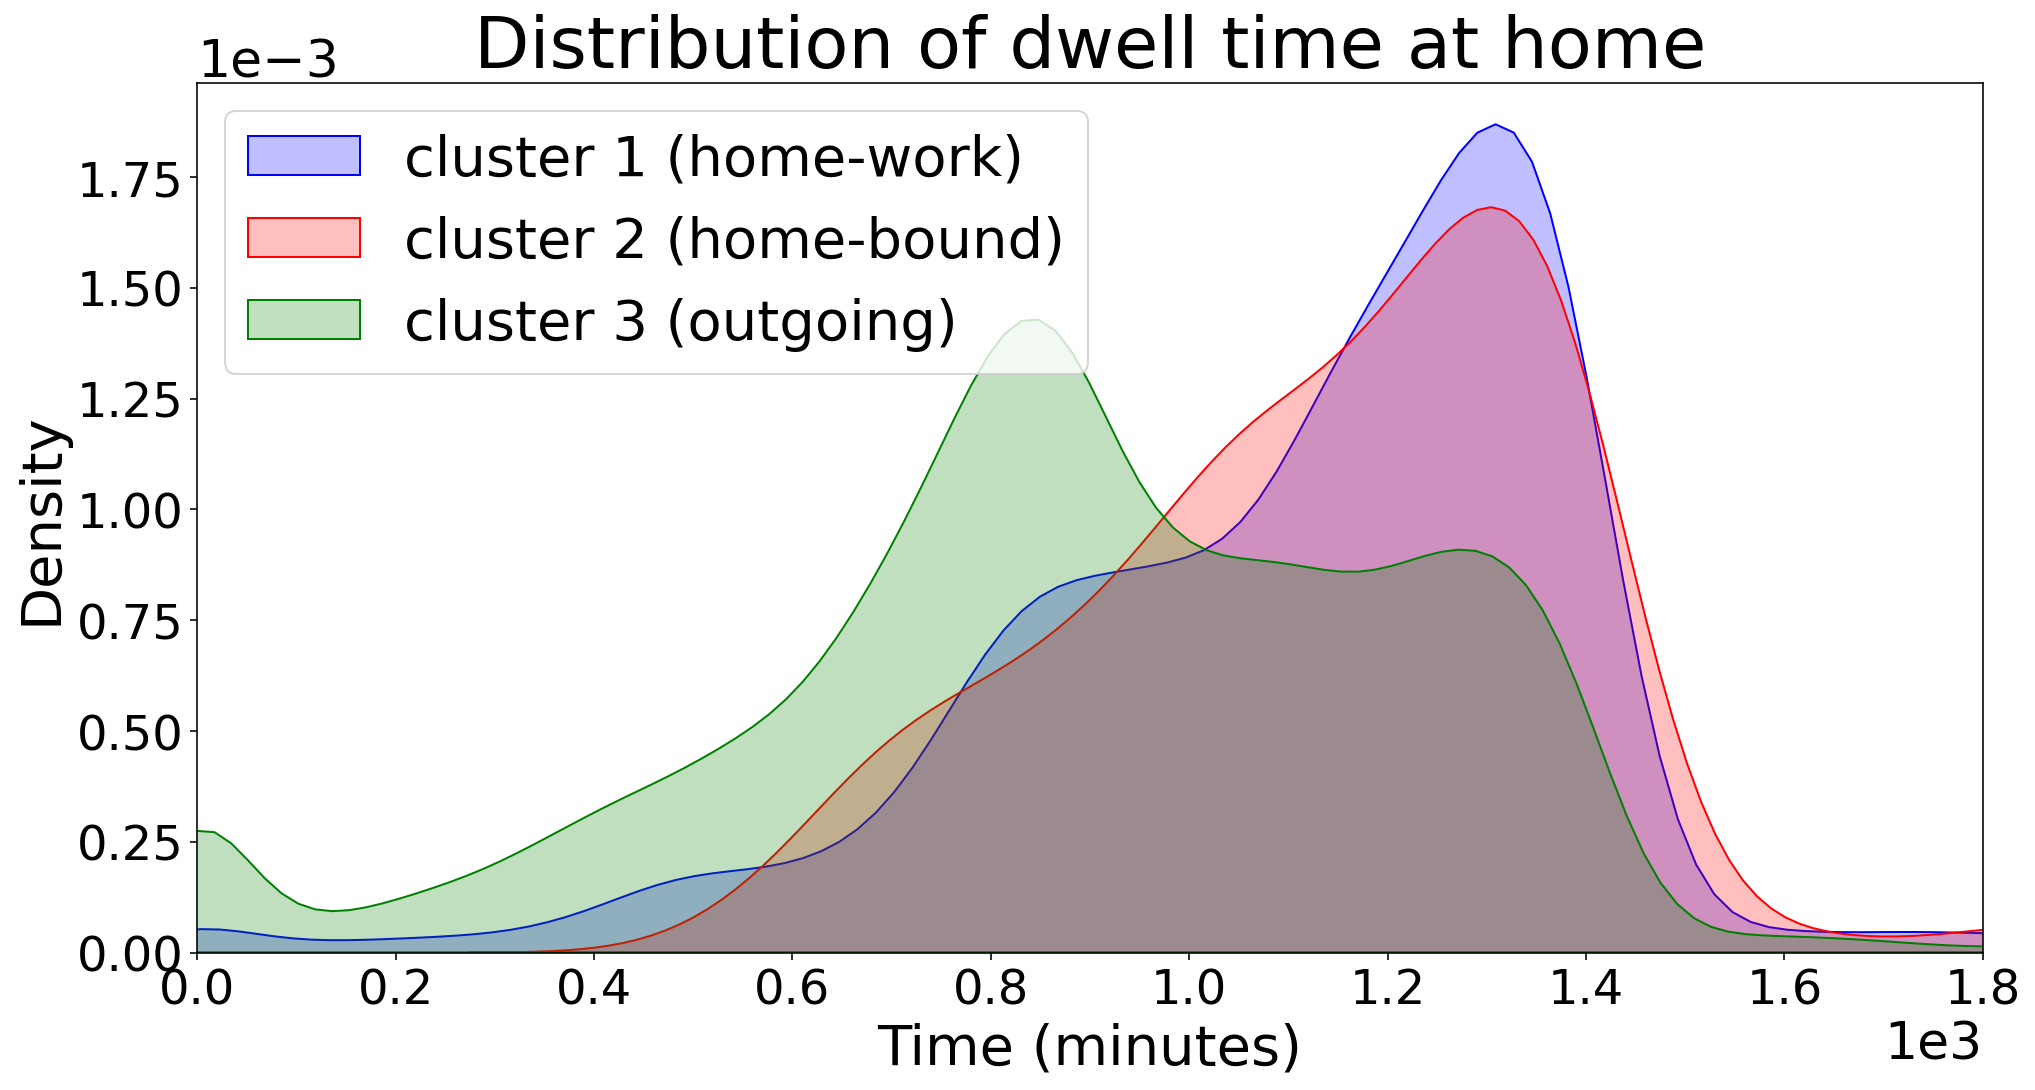

In [11]:
# fig = plt.figure(figsize = (16,8))
fig, ax = plt.subplots(figsize = (16,8))
p1=sns.kdeplot(cluster_data[cluster_data['cluster_3'] == 0]['dwell_home'], shade=True, label = 'cluster 1 (home-work)',color = '#0000FF')
p1=sns.kdeplot(cluster_data[cluster_data['cluster_3'] == 1]['dwell_home'], shade=True,label = 'cluster 2 (home-bound)',color = '#FF0000')
p1=sns.kdeplot(cluster_data[cluster_data['cluster_3'] == 2]['dwell_home'], shade=True,label = 'cluster 3 (outgoing)',color ='#008000')
# p1=sns.kdeplot(trip_inter_2_nor_3_home, shade=True,label = 'Cluster 4',color ='#000800')
# p1=sns.kdeplot(trip_inter_2_nor_4_home, shade=True, label = 'Cluster 5',color = '#87CEFA')
# p1=sns.kdeplot(trip_inter_2_nor_5_home, shade=True,label = 'Cluster 6',color = '#FFA07A')
# p1=sns.kdeplot(trip_inter_2_nor_6_home, shade=True,label = 'Cluster 7',color ='#7CFC00')
# p1=sns.kdeplot(trip_inter_2_nor_7_home, shade=True,label = 'Cluster 8',color ='#00FC7C')
# p1=sns.kdeplot(dwell_process_other_home*0.6, shade=True,label = 'Home of others',color = '#87CEFA',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_work*0.6, shade=True,label = 'Workplace of others',color ='#FFA07A',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_public*0.6, shade=True, label = 'Public of Others',color = '#7CFC00',linestyle="--")
plt.title('Distribution of dwell time at home', fontsize=36)
plt.xlabel('Time (minutes)',fontsize=28);
plt.ylabel('Density',fontsize=28);
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0, 1800) 
ax.xaxis.offsetText.set_fontsize(26)
ax.yaxis.offsetText.set_fontsize(26)
ax.ticklabel_format(axis='both', style='sci', scilimits=(1,-3))
# plt.xticle()
ax.legend(loc='upper left',fontsize=28)
plt.show();

fig.savefig('figures/hac_dwell_home_CAPITAL.png', dpi=600)

# fig.savefig('dist_dwell.png',dpi=1200)


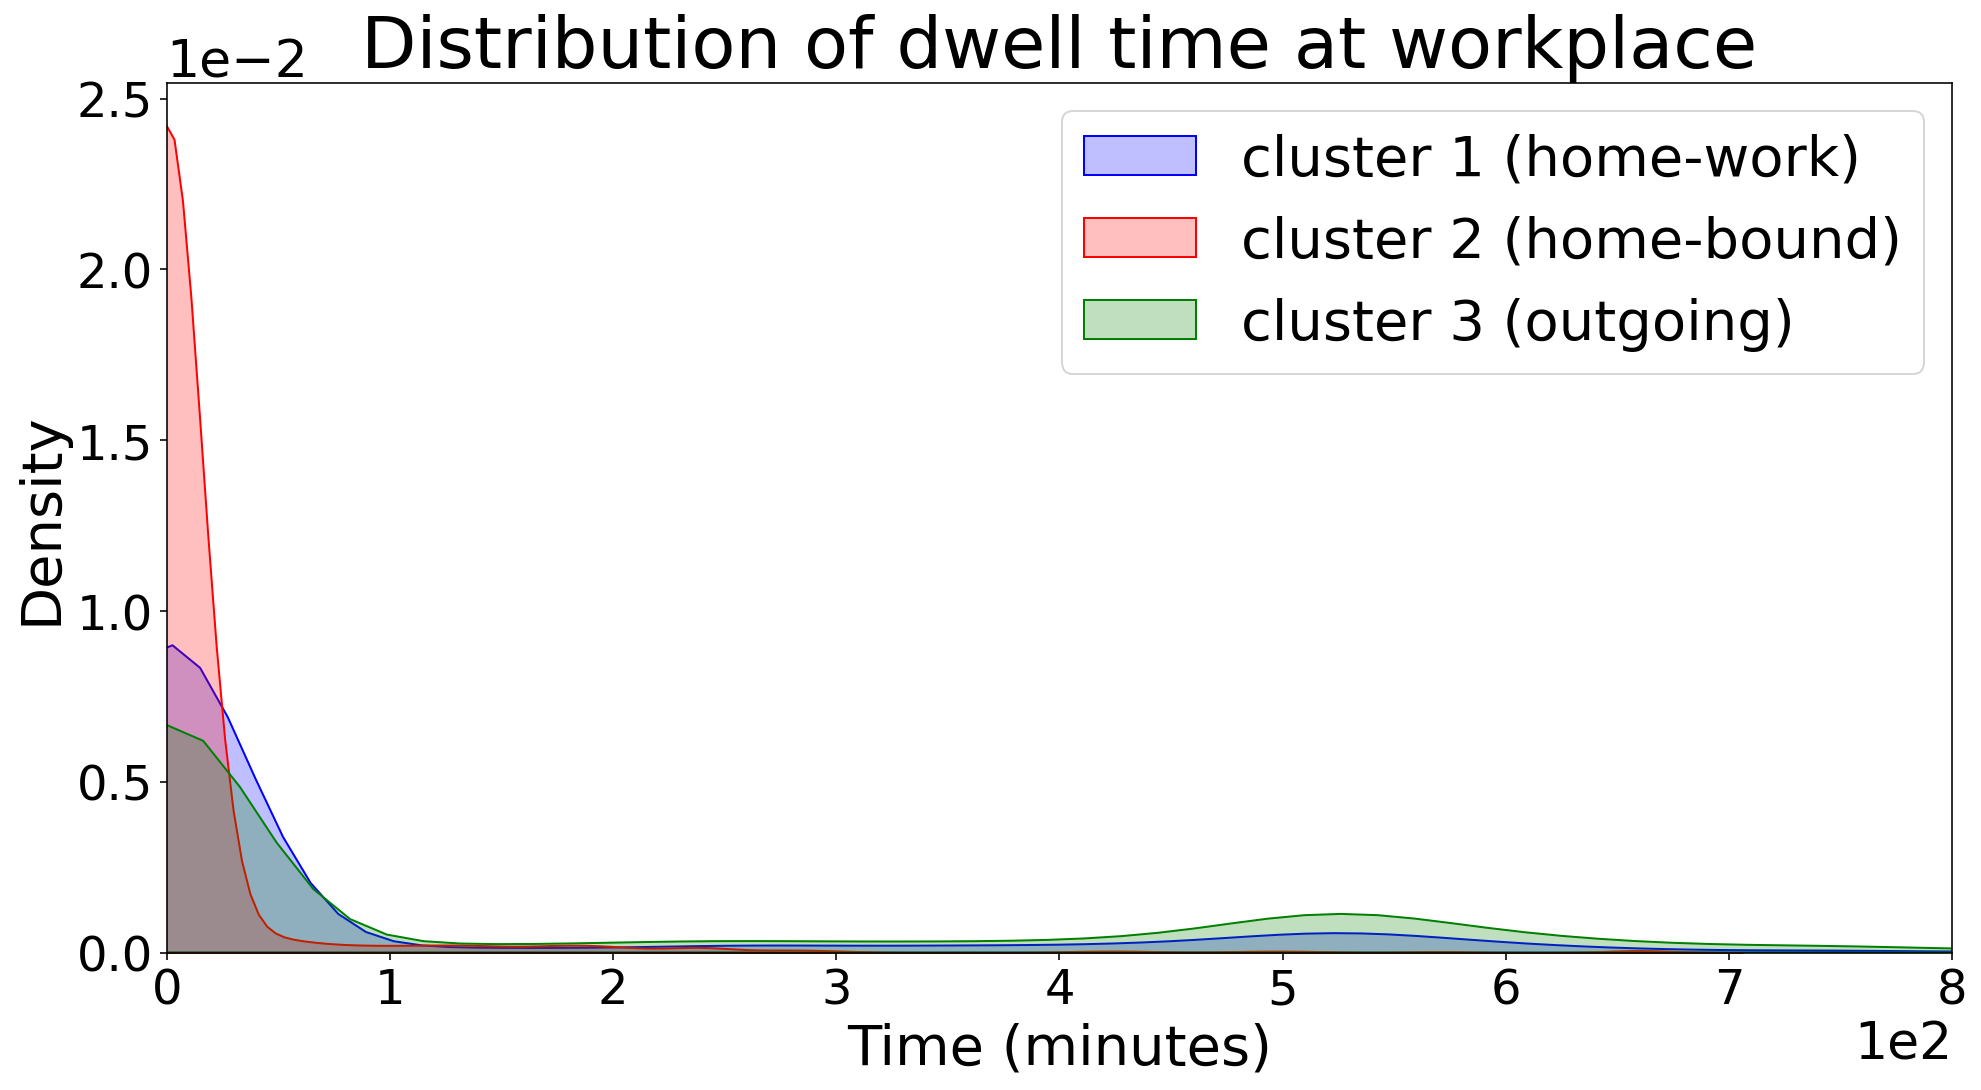

In [12]:
# fig = plt.figure(figsize = (16,8))
fig, ax = plt.subplots(figsize = (16,8))
p1=sns.kdeplot(cluster_data[cluster_data['cluster_3'] == 0]['dwell_work'], shade=True, label = 'cluster 1 (home-work)',color = '#0000FF')
p1=sns.kdeplot(cluster_data[cluster_data['cluster_3'] == 1]['dwell_work'], shade=True,label = 'cluster 2 (home-bound)',color = '#FF0000')
p1=sns.kdeplot(cluster_data[cluster_data['cluster_3'] == 2]['dwell_work'], shade=True,label = 'cluster 3 (outgoing)',color ='#008000')
# p1=sns.kdeplot(trip_inter_2_nor_3['dwell_work'].astype('float64'), shade=True,label = 'Cluster 4',color ='#000800')
# p1=sns.kdeplot(trip_inter_2_nor_4['dwell_work'].astype('float64'), shade=True, label = 'Cluster 5',color = '#87CEFA')
# p1=sns.kdeplot(trip_inter_2_nor_5['dwell_work'].astype('float64'), shade=True,label = 'Cluster 6',color = '#FFA07A')
# p1=sns.kdeplot(trip_inter_2_nor_6['dwell_work'].astype('float64'), shade=True,label = 'Cluster 7',color ='#7CFC00')
# p1=sns.kdeplot(trip_inter_2_nor_7['dwell_work'].astype('float64'), shade=True,label = 'Cluster 8',color ='#00FC7C')
# p1=sns.kdeplot(trip_inter_2_nor_3['dwell_work'], shade=True,label = 'Cluster 4',color ='#000800')
# p1=sns.kdeplot(dwell_process_other_home*0.6, shade=True,label = 'Home of others',color = '#87CEFA',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_work*0.6, shade=True,label = 'Workplace of others',color ='#FFA07A',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_public*0.6, shade=True, label = 'Public of Others',color = '#7CFC00',linestyle="--")
plt.title('Distribution of dwell time at workplace', fontsize=36)
plt.xlabel('Time (minutes)',fontsize=28);
plt.ylabel('Density',fontsize=28);
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0, 800) 
ax.xaxis.offsetText.set_fontsize(26)
ax.yaxis.offsetText.set_fontsize(26)
ax.ticklabel_format(axis='both', style='sci', scilimits=(1,-2))
# plt.xticle()
plt.legend(loc='best',fontsize=28);
plt.show();

fig.savefig('figures/hac_dwell_work_CAPITAL.png', dpi=600)
# fig.savefig('dist_dwell.png',dpi=1200)

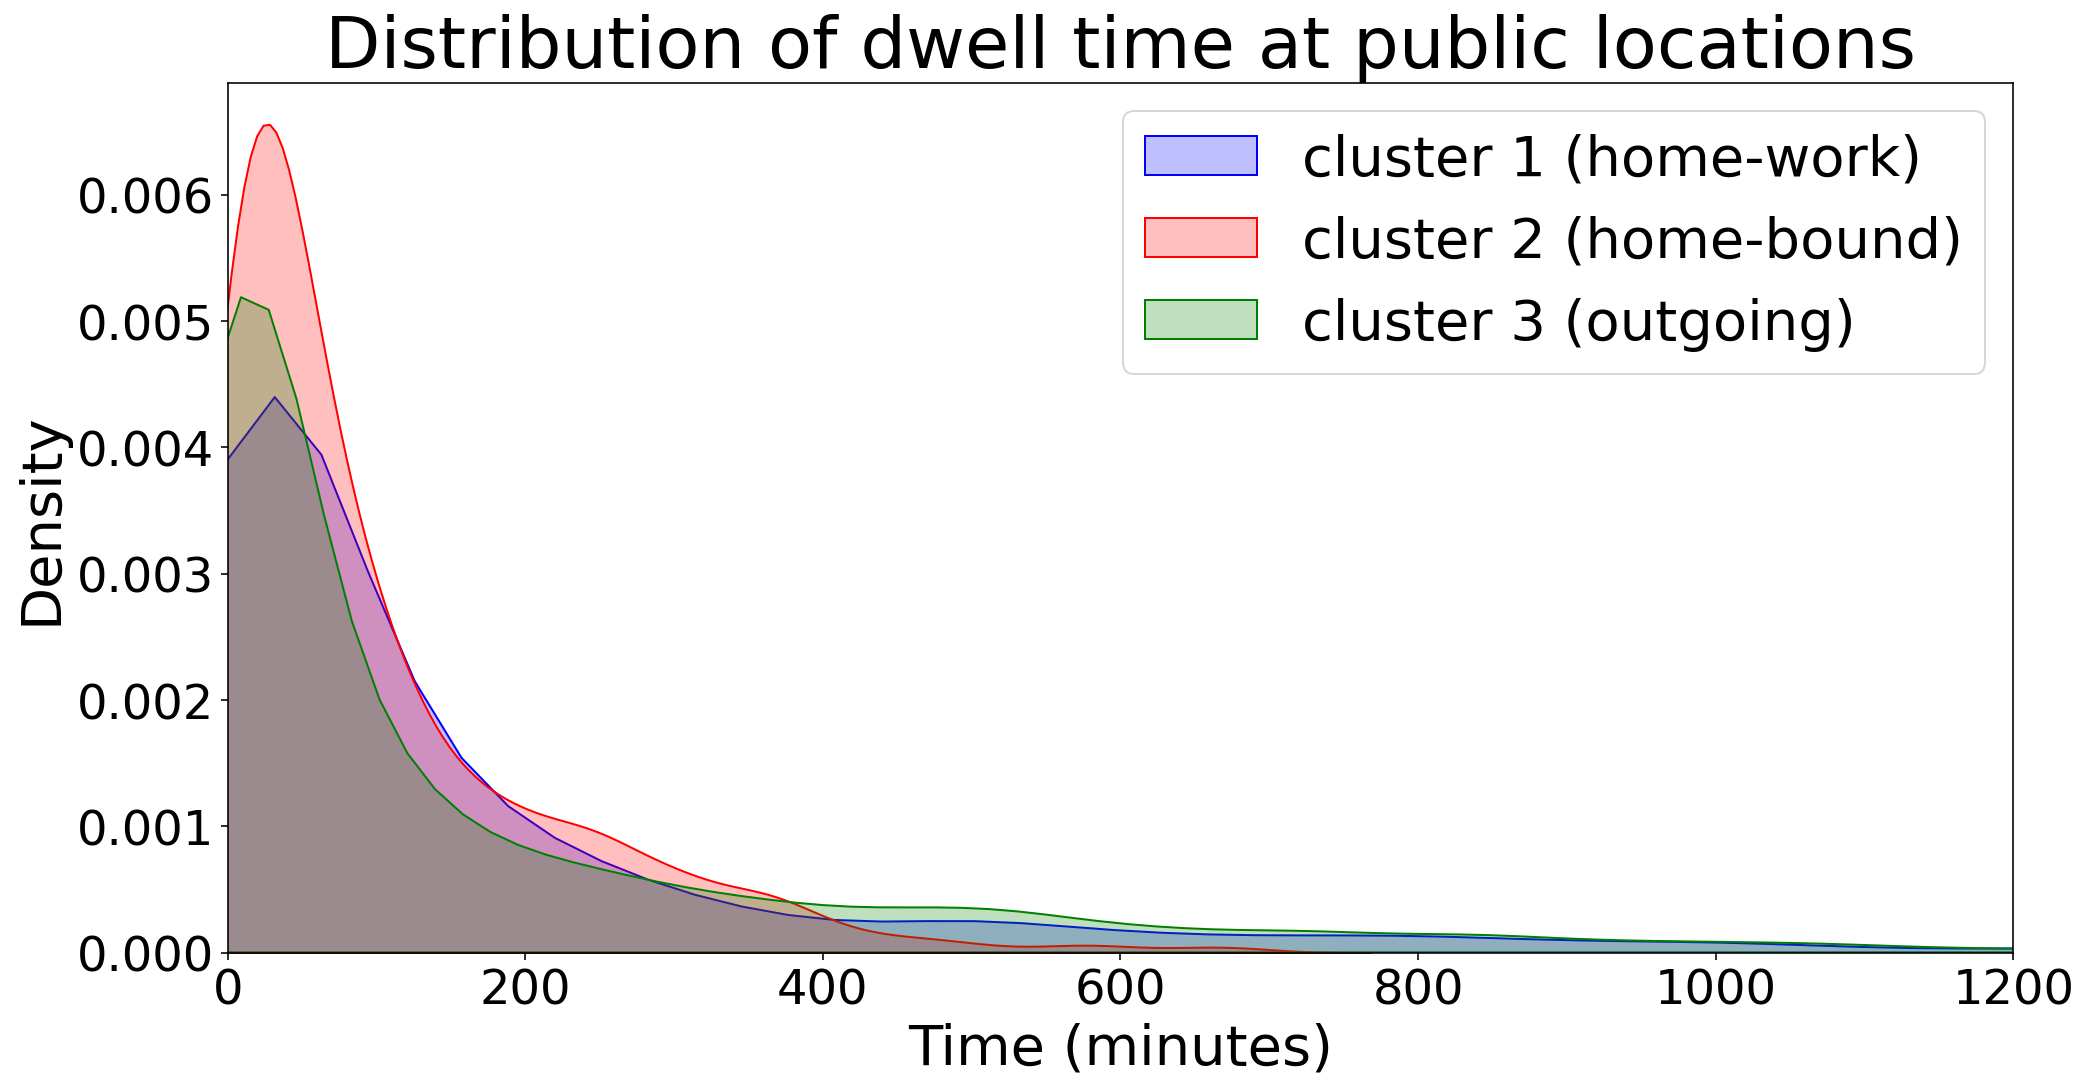

In [13]:
# fig = plt.figure(figsize = (16,8))
fig, ax = plt.subplots(figsize = (16,8))
p1=sns.kdeplot(cluster_data[cluster_data['cluster_3'] == 0]['dwell_public'], shade=True, label ='cluster 1 (home-work)',color = '#0000FF')
p1=sns.kdeplot(cluster_data[cluster_data['cluster_3'] == 1]['dwell_public'], shade=True,label = 'cluster 2 (home-bound)',color = '#FF0000')
p1=sns.kdeplot(cluster_data[cluster_data['cluster_3'] == 2]['dwell_public'], shade=True,label = 'cluster 3 (outgoing)',color ='#008000')
# p1=sns.kdeplot(trip_inter_2_nor_3['dwell_public'].astype('float64'), shade=True,label = 'Cluster 4',color ='#000800')
# p1=sns.kdeplot(trip_inter_2_nor_4['dwell_public'].astype('float64'), shade=True, label = 'Cluster 5',color = '#87CEFA')
# p1=sns.kdeplot(trip_inter_2_nor_5['dwell_public'].astype('float64'), shade=True,label = 'Cluster 6',color = '#FFA07A')
# p1=sns.kdeplot(trip_inter_2_nor_6['dwell_public'].astype('float64'), shade=True,label = 'Cluster 7',color ='#7CFC00')
# p1=sns.kdeplot(trip_inter_2_nor_7['dwell_public'].astype('float64'), shade=True,label = 'Cluster 8',color ='#00FC7C')
# p1=sns.kdeplot(trip_inter_2_nor_3['dwell_public'].astype('float64'), shade=True,label = 'Cluster 4',color ='#000800')
# p1=sns.kdeplot(dwell_process_other_home*0.6, shade=True,label = 'Home of others',color = '#87CEFA',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_work*0.6, shade=True,label = 'Workplace of others',color ='#FFA07A',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_public*0.6, shade=True, label = 'Public of Others',color = '#7CFC00',linestyle="--")
plt.title('Distribution of dwell time at public locations', fontsize=36)
plt.xlabel('Time (minutes)',fontsize=28);
plt.ylabel('Density',fontsize=28);
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0, 1200) 
# ax.xaxis.offsetText.set_fontsize(26)
# ax.yaxis.offsetText.set_fontsize(26)
# ax.ticklabel_format(axis='y', style='sci', scilimits=(1,-2))
# plt.xticle()
plt.legend(loc='best',fontsize=28)
plt.show();

fig.savefig('figures/hac_dwell_public_CAPITAL.png', dpi=600)
# fig.savefig('dist_dwell.png',dpi=1200)

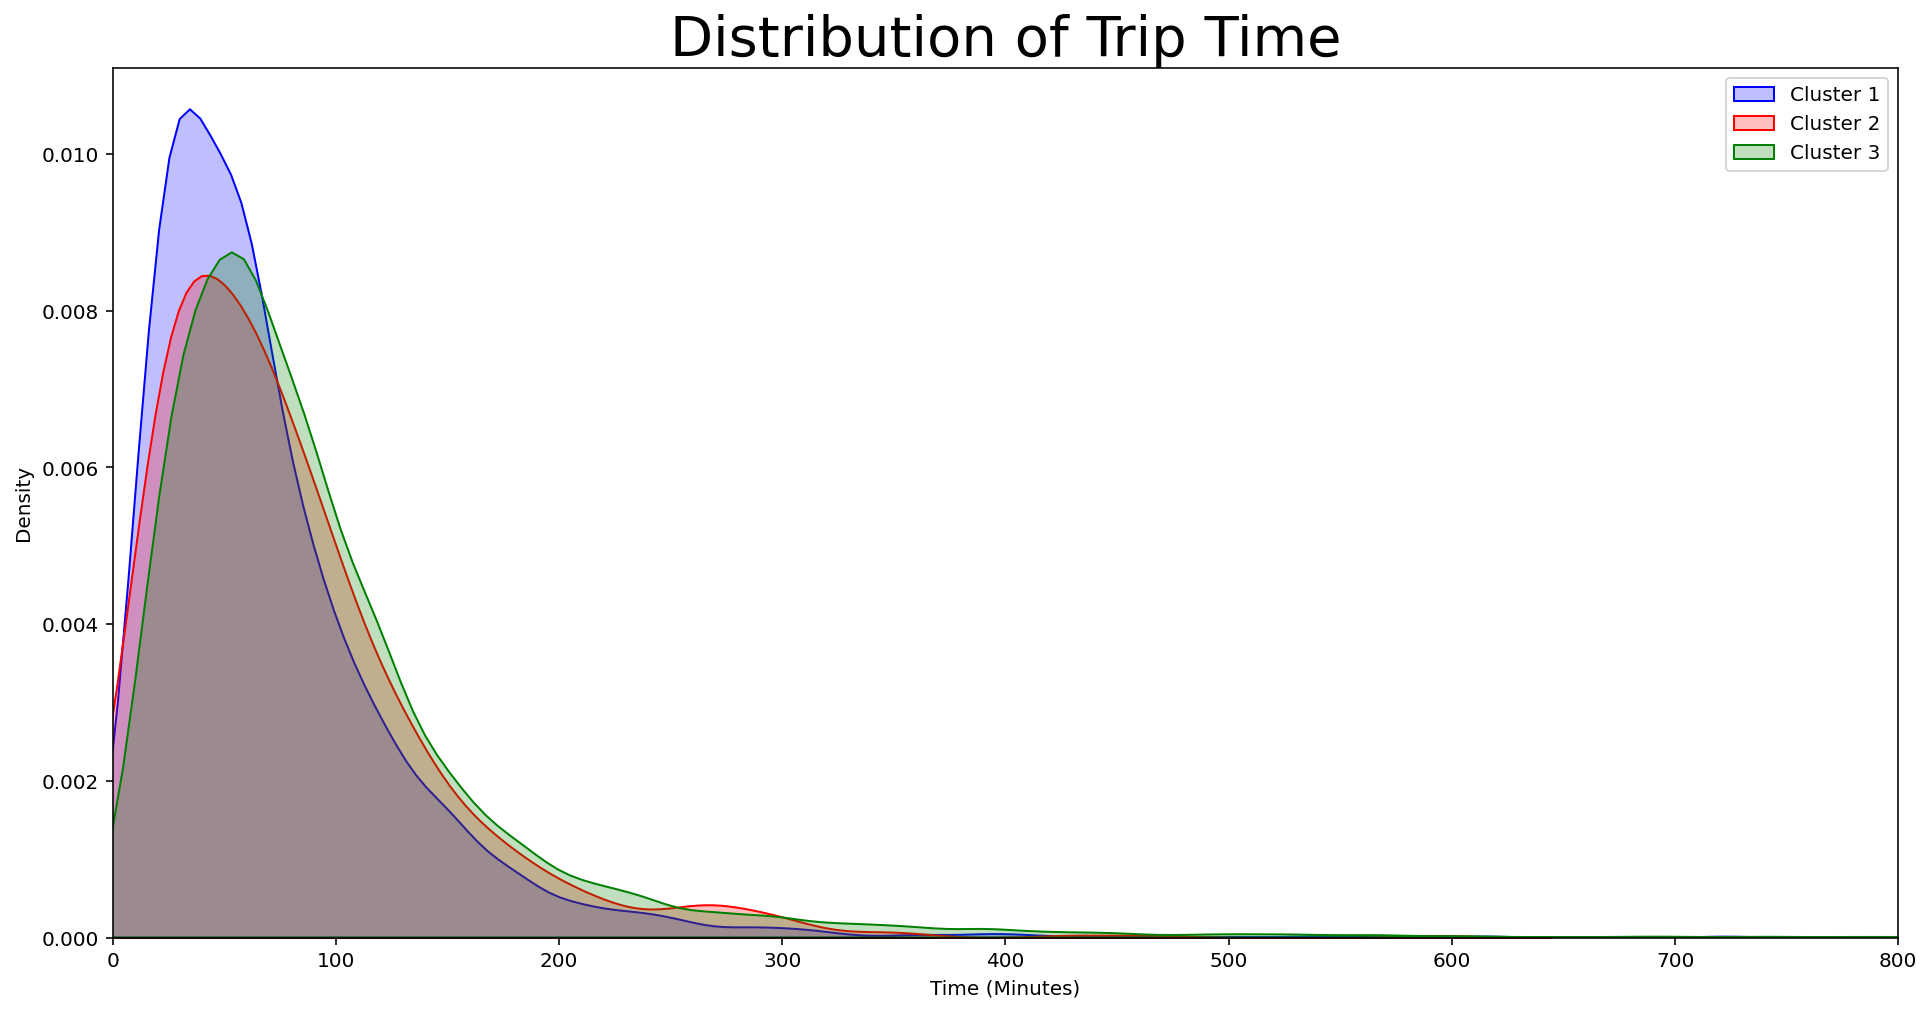

In [23]:
fig = plt.figure(figsize = (16,8))
p1=sns.kdeplot(cluster_data[cluster_data['cluster_3'] == 0]['TRVLCMIN'], shade=True, label = 'Cluster 1',color = '#0000FF')
p1=sns.kdeplot(cluster_data[cluster_data['cluster_3'] == 1]['TRVLCMIN'], shade=True,label = 'Cluster 2',color = '#FF0000')
p1=sns.kdeplot(cluster_data[cluster_data['cluster_3'] == 2]['TRVLCMIN'], shade=True,label = 'Cluster 3',color ='#008000')
# p1=sns.kdeplot(trip_inter_2_nor_3['TRVLCMIN'].astype('float64'), shade=True,label = 'Cluster 4',color ='#000800')
# p1=sns.kdeplot(trip_inter_2_nor_4['TRVLCMIN'].astype('float64'), shade=True, label = 'Cluster 5',color = '#87CEFA')
# p1=sns.kdeplot(trip_inter_2_nor_5['TRVLCMIN'].astype('float64'), shade=True,label = 'Cluster 6',color = '#FFA07A')
# p1=sns.kdeplot(trip_inter_2_nor_6['TRVLCMIN'].astype('float64'), shade=True,label = 'Cluster 7',color ='#7CFC00')
# p1=sns.kdeplot(trip_inter_2_nor_7['TRVLCMIN'].astype('float64'), shade=True,label = 'Cluster 8',color ='#00FC7C')
# p1=sns.kdeplot(trip_inter_2_nor_3['TRVLCMIN'].astype('float64'), shade=True,label = 'Cluster 4',color ='#000800')
# p1=sns.kdeplot(dwell_process_other_home*0.6, shade=True,label = 'Home of others',color = '#87CEFA',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_work*0.6, shade=True,label = 'Workplace of others',color ='#FFA07A',linestyle="--")
# p1=sns.kdeplot(dwell_process_other_public*0.6, shade=True, label = 'Public of Others',color = '#7CFC00',linestyle="--")
plt.title('Distribution of Trip Time', fontsize=28)
plt.xlabel('Time (Minutes)');
plt.ylabel('Density');
plt.xlim(0, 800) 
# plt.xticle()
plt.legend(loc='best')
plt.show();

# fig.savefig('dist_dwell.png',dpi=1200)

In [9]:
from scipy import stats
tod = []
for i in range(24):
    tod.append(str(i) + ':00 to ' + str(i+1) + ':00')
    
avg_vmt_0 = [0 for i in range(24)]
std_vmt_0 = [0 for i in range(24)]
avg_vmt_1 = [0 for i in range(24)]
std_vmt_1 = [0 for i in range(24)]
avg_vmt_2 = [0 for i in range(24)]
std_vmt_2 = [0 for i in range(24)]

avg_loc_0 = [0 for i in range(24)]
std_loc_0 = [0 for i in range(24)]
avg_loc_1 = [0 for i in range(24)]
std_loc_1 = [0 for i in range(24)]
avg_loc_2 = [0 for i in range(24)]
std_loc_2 = [0 for i in range(24)]

mode_loc_0 = [0 for i in range(24)]
mode_loc_1 = [0 for i in range(24)]
mode_loc_2 = [0 for i in range(24)]

for j in range(24):
        avg_vmt_0[j] = cluster_data[cluster_data['cluster_3'] == 0]['VMT_Hr'+str(j+1)].mean()
        std_vmt_0[j] = cluster_data[cluster_data['cluster_3'] == 0]['VMT_Hr'+str(j+1)].std()
        avg_vmt_1[j] = cluster_data[cluster_data['cluster_3'] == 1]['VMT_Hr'+str(j+1)].mean()
        std_vmt_1[j] = cluster_data[cluster_data['cluster_3'] == 1]['VMT_Hr'+str(j+1)].std()
        avg_vmt_2[j] = cluster_data[cluster_data['cluster_3'] == 2]['VMT_Hr'+str(j+1)].mean()
        std_vmt_2[j] = cluster_data[cluster_data['cluster_3'] == 2]['VMT_Hr'+str(j+1)].std()
        avg_loc_0[j] = cluster_data[cluster_data['cluster_3'] == 0]['location_hr_'+str(j+1)].mean()
        std_loc_0[j] = cluster_data[cluster_data['cluster_3'] == 0]['location_hr_'+str(j+1)].std()
        avg_loc_1[j] = cluster_data[cluster_data['cluster_3'] == 1]['location_hr_'+str(j+1)].mean()
        std_loc_1[j] = cluster_data[cluster_data['cluster_3'] == 1]['location_hr_'+str(j+1)].std() 
        avg_loc_2[j] = cluster_data[cluster_data['cluster_3'] == 2]['location_hr_'+str(j+1)].mean()
        std_loc_2[j] = cluster_data[cluster_data['cluster_3'] == 2]['location_hr_'+str(j+1)].std() 
        
#         mode_loc_0[j] = stats.mode(cluster_data[cluster_data['cluster_3'] == 0]['location_hr_'+str(j+1)])[0][0]
#         mode_loc_1[j] = stats.mode(cluster_data[cluster_data['cluster_3'] == 1]['location_hr_'+str(j+1)])[0][0]
#         mode_loc_2[j] = stats.mode(cluster_data[cluster_data['cluster_3'] == 2]['location_hr_'+str(j+1)])[0][0]
        


In [10]:
stats.mode(cluster_data[cluster_data['cluster_3'] == 0]['location_hr_'+str(0+1)])[0][0]

0

In [11]:
avg_vmt_0 = np.asarray(avg_vmt_0)
std_vmt_0 = np.asarray(std_vmt_0)
avg_vmt_1 = np.asarray(avg_vmt_1)
std_vmt_1 = np.asarray(std_vmt_1)
avg_vmt_2 = np.asarray(avg_vmt_2)
std_vmt_2 = np.asarray(std_vmt_2)
avg_loc_0 = np.asarray(avg_loc_0)
std_loc_0 = np.asarray(std_loc_0)
avg_loc_1 = np.asarray(avg_loc_1)
std_loc_1 = np.asarray(std_loc_1)
avg_loc_2 = np.asarray(avg_loc_2)
std_loc_2 = np.asarray(std_loc_2)

mode_loc_0 = np.asarray(mode_loc_0)
mode_loc_1 = np.asarray(mode_loc_1)
mode_loc_2 = np.asarray(mode_loc_2)


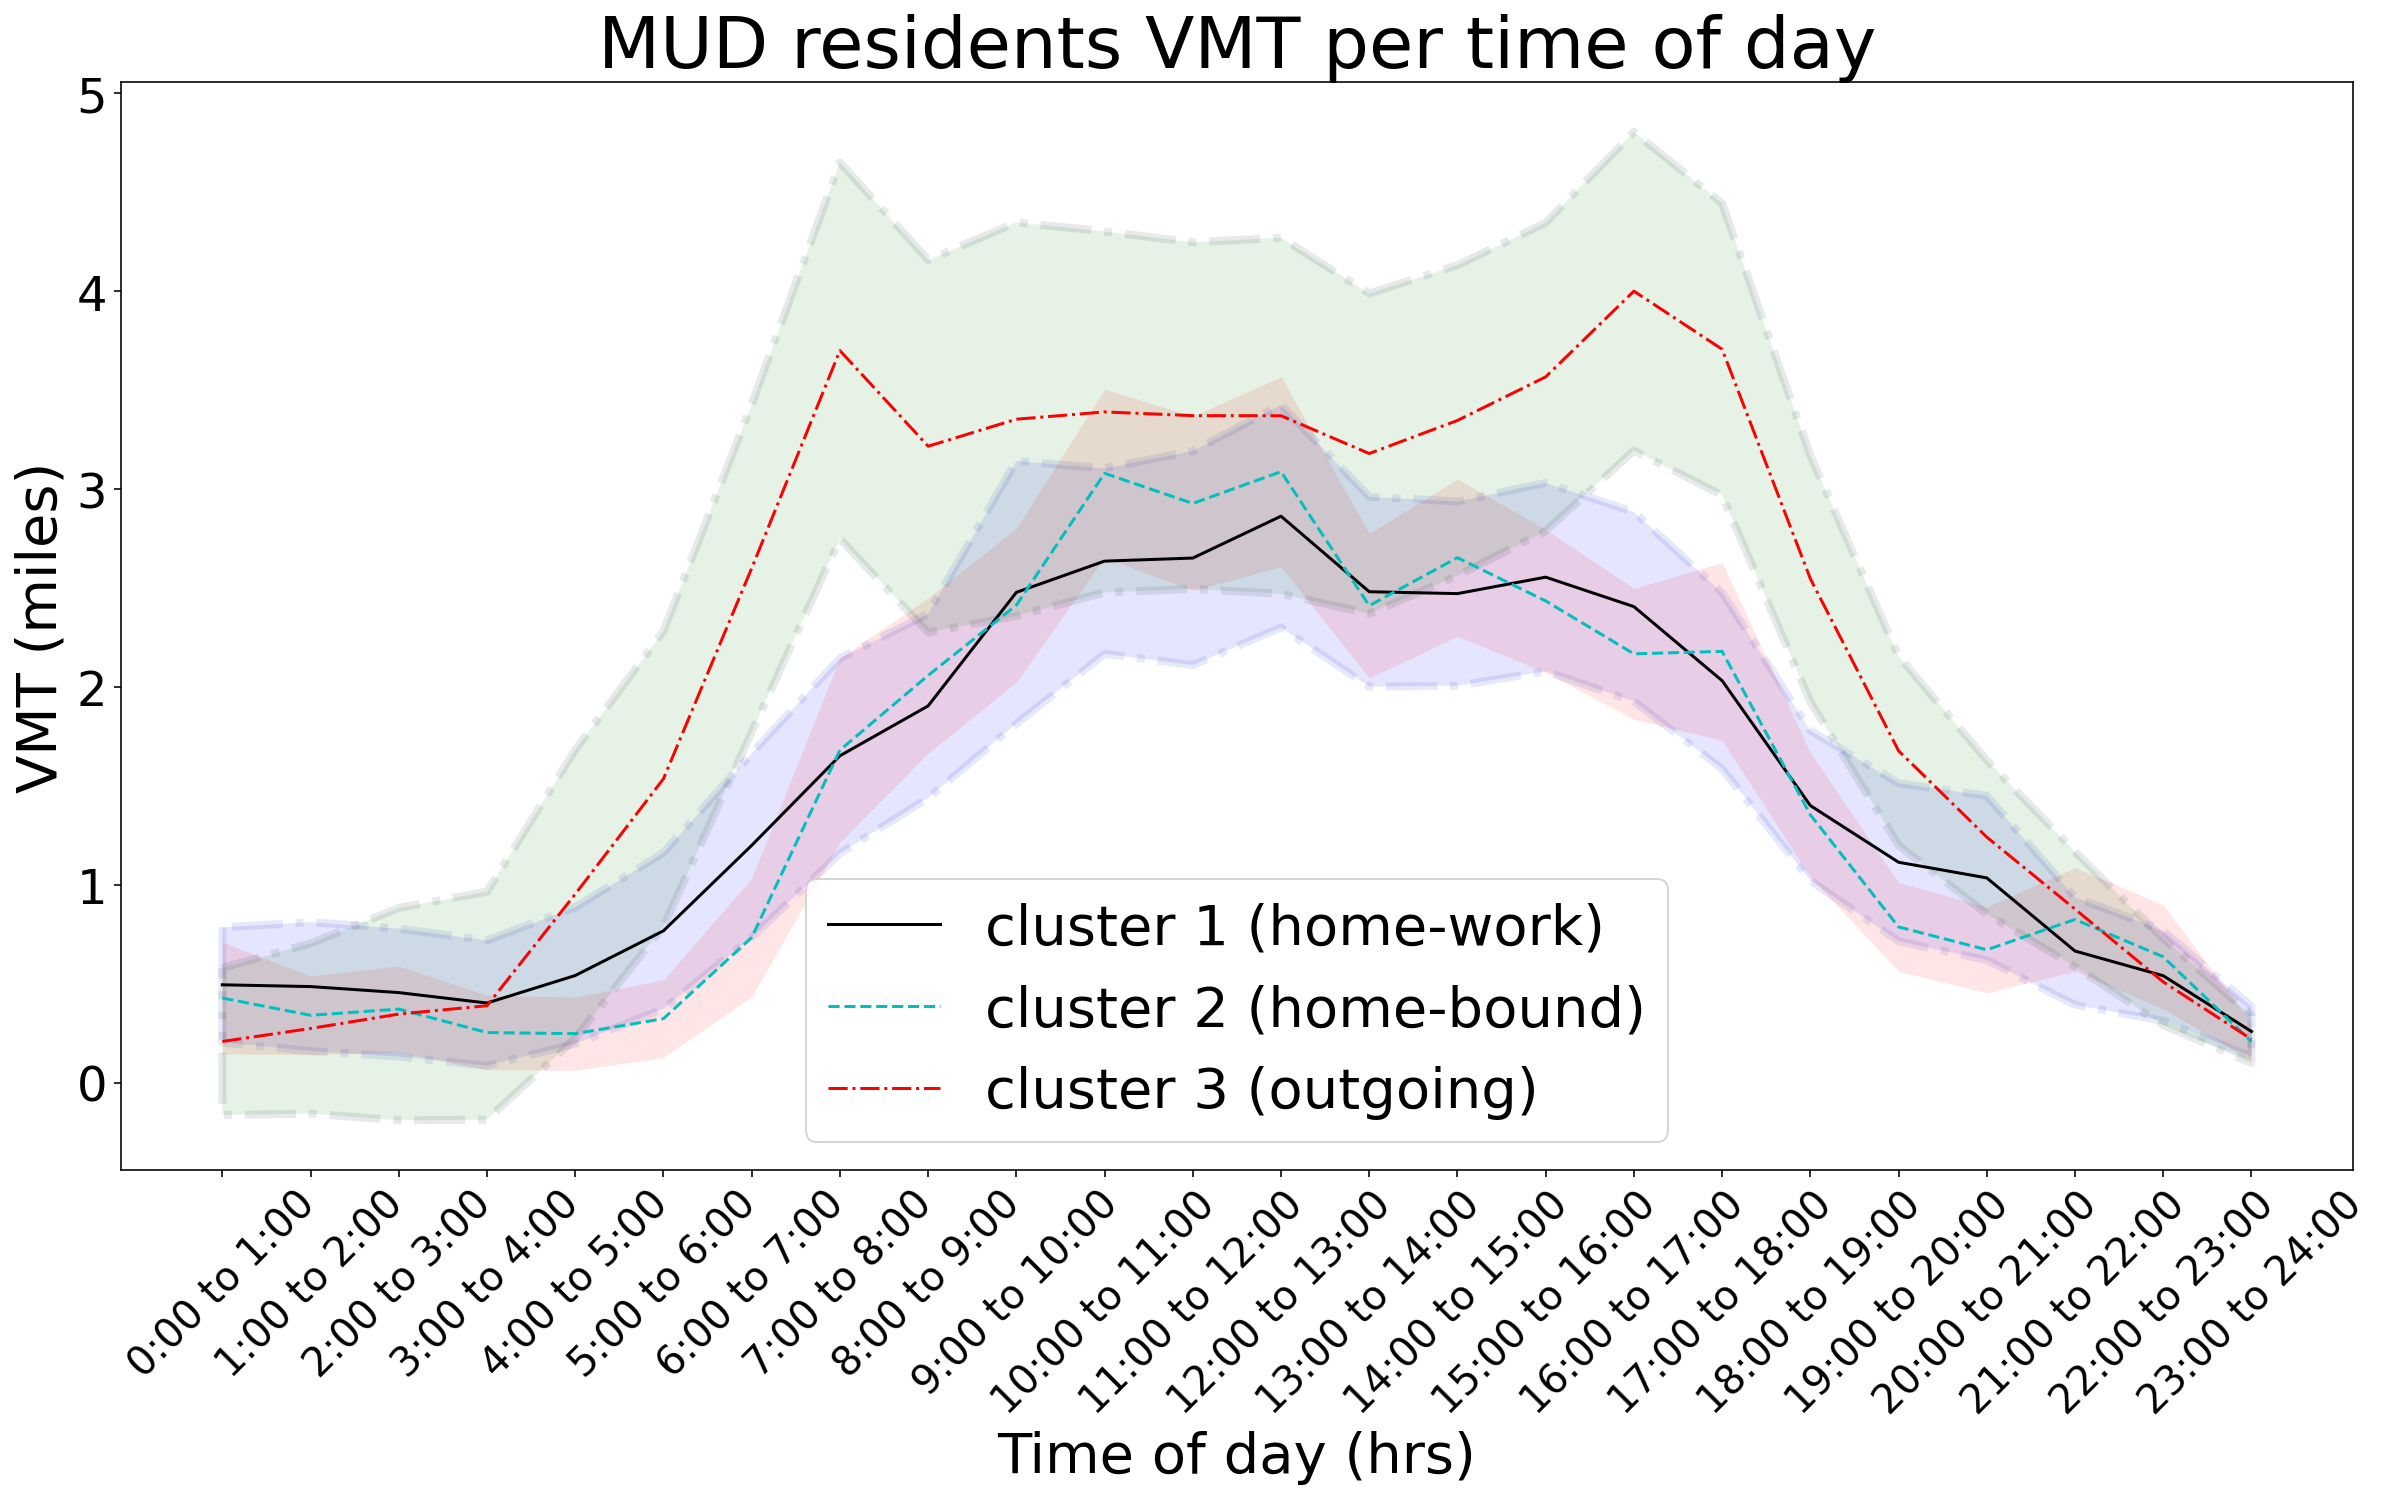

In [12]:
fig = plt.figure(figsize=(20,10))
plt.plot(tod, avg_vmt_0, 'k-', label = 'cluster 1 (home-work)')
plt.plot(tod, avg_vmt_1, 'c--', label = 'cluster 2 (home-bound)')
plt.plot(tod, avg_vmt_2, 'r-.', label = 'cluster 3 (outgoing)')
# plt.plot(tod, avg_vmt_3, 'm:', label = 'Cluster 4')
plt.fill_between(tod, avg_vmt_0-0.05*std_vmt_0, avg_vmt_0+0.05*std_vmt_0,alpha=0.1, edgecolor='#1B2ACC', facecolor='#0000FF',
    linewidth=4, linestyle='dashdot', antialiased=True)
plt.fill_between(tod, avg_vmt_1-0.05*std_vmt_1, avg_vmt_1+0.05*std_vmt_1,alpha=0.1, edgecolor='#3F7F4C', facecolor='#FF0000',
    linewidth=0)
plt.fill_between(tod, avg_vmt_2-0.05*std_vmt_2, avg_vmt_2+0.05*std_vmt_2,alpha=0.1, edgecolor='#1D2C3C', facecolor='#008000',
    linewidth=4, linestyle='dashdot', antialiased=True)
# plt.fill_between(tod, avg_vmt_3-0.05*std_vmt_3, avg_vmt_3+0.05*std_vmt_3,alpha=0.1, edgecolor='#2F4FCC', facecolor='#7EFF99',
#     linewidth=0)
plt.xticks(rotation=45)
plt.xlabel('Time of day (hrs)',fontsize=28)
plt.ylabel('VMT (miles)',fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=24)
plt.title('MUD residents VMT per time of day',fontsize=36)
plt.legend(loc='best',fontsize=28)

plt.show()

# fig.savefig('figures/hac_vmt_CAPITAL.png', dpi=600)